In [1]:
import sys
import re
import missingno as msno
from functools import reduce

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


import plotly
import plotly.graph_objects as go
from PIL import Image
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False
from IPython.display import set_matplotlib_formats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 기업의 지속 가능한 성장과 기업의 사회적 책임(ESG)

    "Investors are increasingly convinced that integration of ESG into their investment process maximizes
    their long-term interest and that good corporate governance and sustainability
    will contribute to the creation of long-term value for shareholders."
    (Benlemlih, M. 2019)
 
- 기업의 적절한 사회적 책임 이행은 기업의 장기적이고 지속적인 성장과 관련있으며 의사결정을 내릴 때 사용되는 재무지표가 Key Performance Indicators (KPIs) 이다. 

  이 지표는 신용평가 기관에서 사용하는 지표와 비슷하다.

    "기업의 사회적 책임이 항상 일정하게 추진되는 것이 아니라 외부 충격(예:경제위기)등의 시기에 급격하게 후퇴하는 것으로 나타났다"<br>
    (한국 대기업의 사회적 책임에 관한 연구_정흥준 외)


- 어떠한 위기로 재무상태가 좋지 못할 경우 ESG에 대한 투자가 어려워  기업의 위기가 찾아와 재무상태가 좋지 못하게 되는 경우 

  기업의 ESG 점수와 신용평가 등급이 떨어질 것이다


<img src='재무정보/test.png' width="700" height="550" align="left"/>

### 사회적 책임 세분화 기준

- 기업의 사회적 책임을 나누는 기주는 크게 3가지이다


<u>E-환경, S-사회, G-지배구조</u>

- 환경은 말그대로 환경 유지에 기업이 어떤 역활을 하는가이다

- 사회란 기업이 속한 지역사회의 가치를 실현 등의 외부적 요소와 내부 구성원들의 환경 및 처우 등이 관련된 내부 요소로 나뉨 

- 지배구조란 기업의 내부 시스템의 퍼포먼스로 기업윤리 및 주주들의 이윤 극대화에 얼마나 충실한지와 내부 구성원에 의해 생길 리스크 관리가 포함된다.

- Corporate governance, Codes of business conduct, Risk and Crisis management

### ESG에 관한 연구 해외

    'Our findings suggest that ESG performance, especially concerning social and governance metrics, 
    meaningfully affects credit ratings.'
    (Devalle, Alain & Fiandrino, Simona & Cantino Valter, 2017, Conclusion.)
 
<u>Regression 모델 사용</u>

   - (환경)Env_Innov_Sc - 0.021, (사회)Community_Sc - 0.001 
   - (지배구조)Product_Resp_Sc - 0.037 (지배구조)Shareholder_Sc - 0.001

    "These six provisions are called the “E-Index” (E for entrenchment), and while they (Bebchuk, Cohen, and Wang, 2012)<br>
    found that both the G-Index and E-Index would have resulted in abnormal returns in the 1990s"<br>
    (Exploring the G in ESG, S&P DOW JONES INDICES, 22 Mar, 2012)
    
    "We find that firms benefit more when they adopt a CSR engagement strategy that is consistent, <br>
    involves related dimensions of CSR, and begins with aspects of CSR that are more internal to the firm." <br>
    (Zhi Tang, Clyde Eiríkur Hull, Sandra Rothenberg, 5 June 2012) 

### 한국에서의 ESG


- 국내 신용평가사는 ESG 일부 요소가 이미 신용등급에 반영돼 있다는 입장이다. 
- 실제로 지배구조(G)가 취약한 기업의 경우 신용등급 산정 시 해당 요소가 부정적으로 작용한다.

    '08~14년까지의 데이터를 보아 E는 음의 관계, S는 관계성이 낮고, G는 양의 관계를 가짐'<br>
    (Han et al. Asian Journal of Sustainability and Social Responsibility, 2016)
    

    'ESG 데이터는 소형 회사의 경우 충분한 데이터를 모을 수 없어  신뢰 할 수 있는 ESG를 구하기 어려움 그래서 규모가 큰 회사를 대상으로 진행하거나 
     ESG를 따로 분리하여 독립적으로 볼 것, G의 중요성을 시사, ESG는 신용등급과 negative한 관계를 가짐'
    
    '연구 결과로는 ESG가 신용평가에 영향을 미치며 기업의 규모에 따라 조금 다르게 영향을 미칠 수 있음, 전반적으로 E의 영향이 우세하며 작은 기업일수록 E의 영향을 많이 받음'
    (ESG Scores and the Credit Market, 25 March 2020)



### 예측 

- 많은 연구들에서 보듯 ESG가 신용등급에 반영에 영향력이 있음을 보이는 연구들을 쉽게 찾을 수 있었다


- 재무상태가 좋지 못한 기업 즉 신용도가 낮은 기업은 기업의 사회적 책임을 다하는 의사결정을 내리기 어려울 것이며

  이에 ESG점수가 낮게 나올 것이다 이러한 판단을 하는데 있어 보는지표 KPI는 신용평가사에서 보는 재무지표과 많은 연관이 있다. 


- 결과적으로 재무상태가 좋지 못한 기업은 ESG 스코어가 낮게 내올 것이며 신용평가 역시 낮게 나올 것이다

    <u> 즉 ESG를 사용하면 신용평가 등급을 예측하는데 더 도움이 될 것 </u>

#### 재무지표

- 기업의 신용을 결정 할 때는 그 기업의 자산에 부채가 얼만큼 차지하는지 그 부채를 수익률과 비교해 상환 할 수 있는 능력이 어떻게 되는지를 고려<br>
    (독립변수 2013년 부터 2020년까지의 데이터를 사용)
     
     사용하는 변수<br>
     ROA : 총자산분의 수익률 - 채무상환 능력을 자산에 비교해 보는 지표<br>
     BTEBITDA : 수익으로 부채를 상환 할 수 있는 능력<br>
     EQTA: 자산에서 자본이 차지하는 비율<br>
     DebtR: 자산에서 부채가 차지하는 비율<br>
     LTDTA : 자산에서 장기 부채가 차지하는 비율<br>

<img src='재무정보/table.png' width="700" height="550" align="left"/>

#### ESG지표 


- E,S,G,ESG의 각 점수 (KCGS : 한국기업지배구조원)

- 신용평가 등급(종속변수) : 10개의 등급, 같은 등급의 +,-는 같은 구간으로 두어 책정, ex)AAA-AA-A~~~D
     
     (기업의 신용등급이 성과 및 활동성에 미치는 영향 분석* 원 상 희** 전 봉 걸***)<br>
     (머신러닝 기법을 활용한 기업 신용위험 시계열 예측 모델 개발 연구 : 이현상 and 오세환) <br>
     (나이스 기업신용평가 주요 재무제표.2020) <br>
     (The use of different approaches for credit rating prediction and their comparison : Martina Novotná September 2012) <br>

## Credit Rating

In [2]:
df_credit_2020 = pd.read_excel("2020_credit_rating.xlsx")
df_credit_2020.head()

,Unnamed: 0,평가회사,평가대상회사,평가대상종류,공시일자,평가등급,등급감시,등급전망
0,1,한국기업평가,삼성엔지니어링(주),본평가,2020-01-02,A-,NaN,안정적
1,2,한국기업평가,삼화페인트공업(주),수시평가,2020-01-02,BBB+,NaN,안정적
2,3,나이스신용평가,예금보험공사,본평가,2020-01-08,AAA,NaN,안정적
3,4,한국기업평가,에스케이증권(주),본평가,2020-01-09,A,NaN,안정적
4,5,한국기업평가,우리종합금융(주),본평가 (정정),2020-01-09,A,NaN,안정적


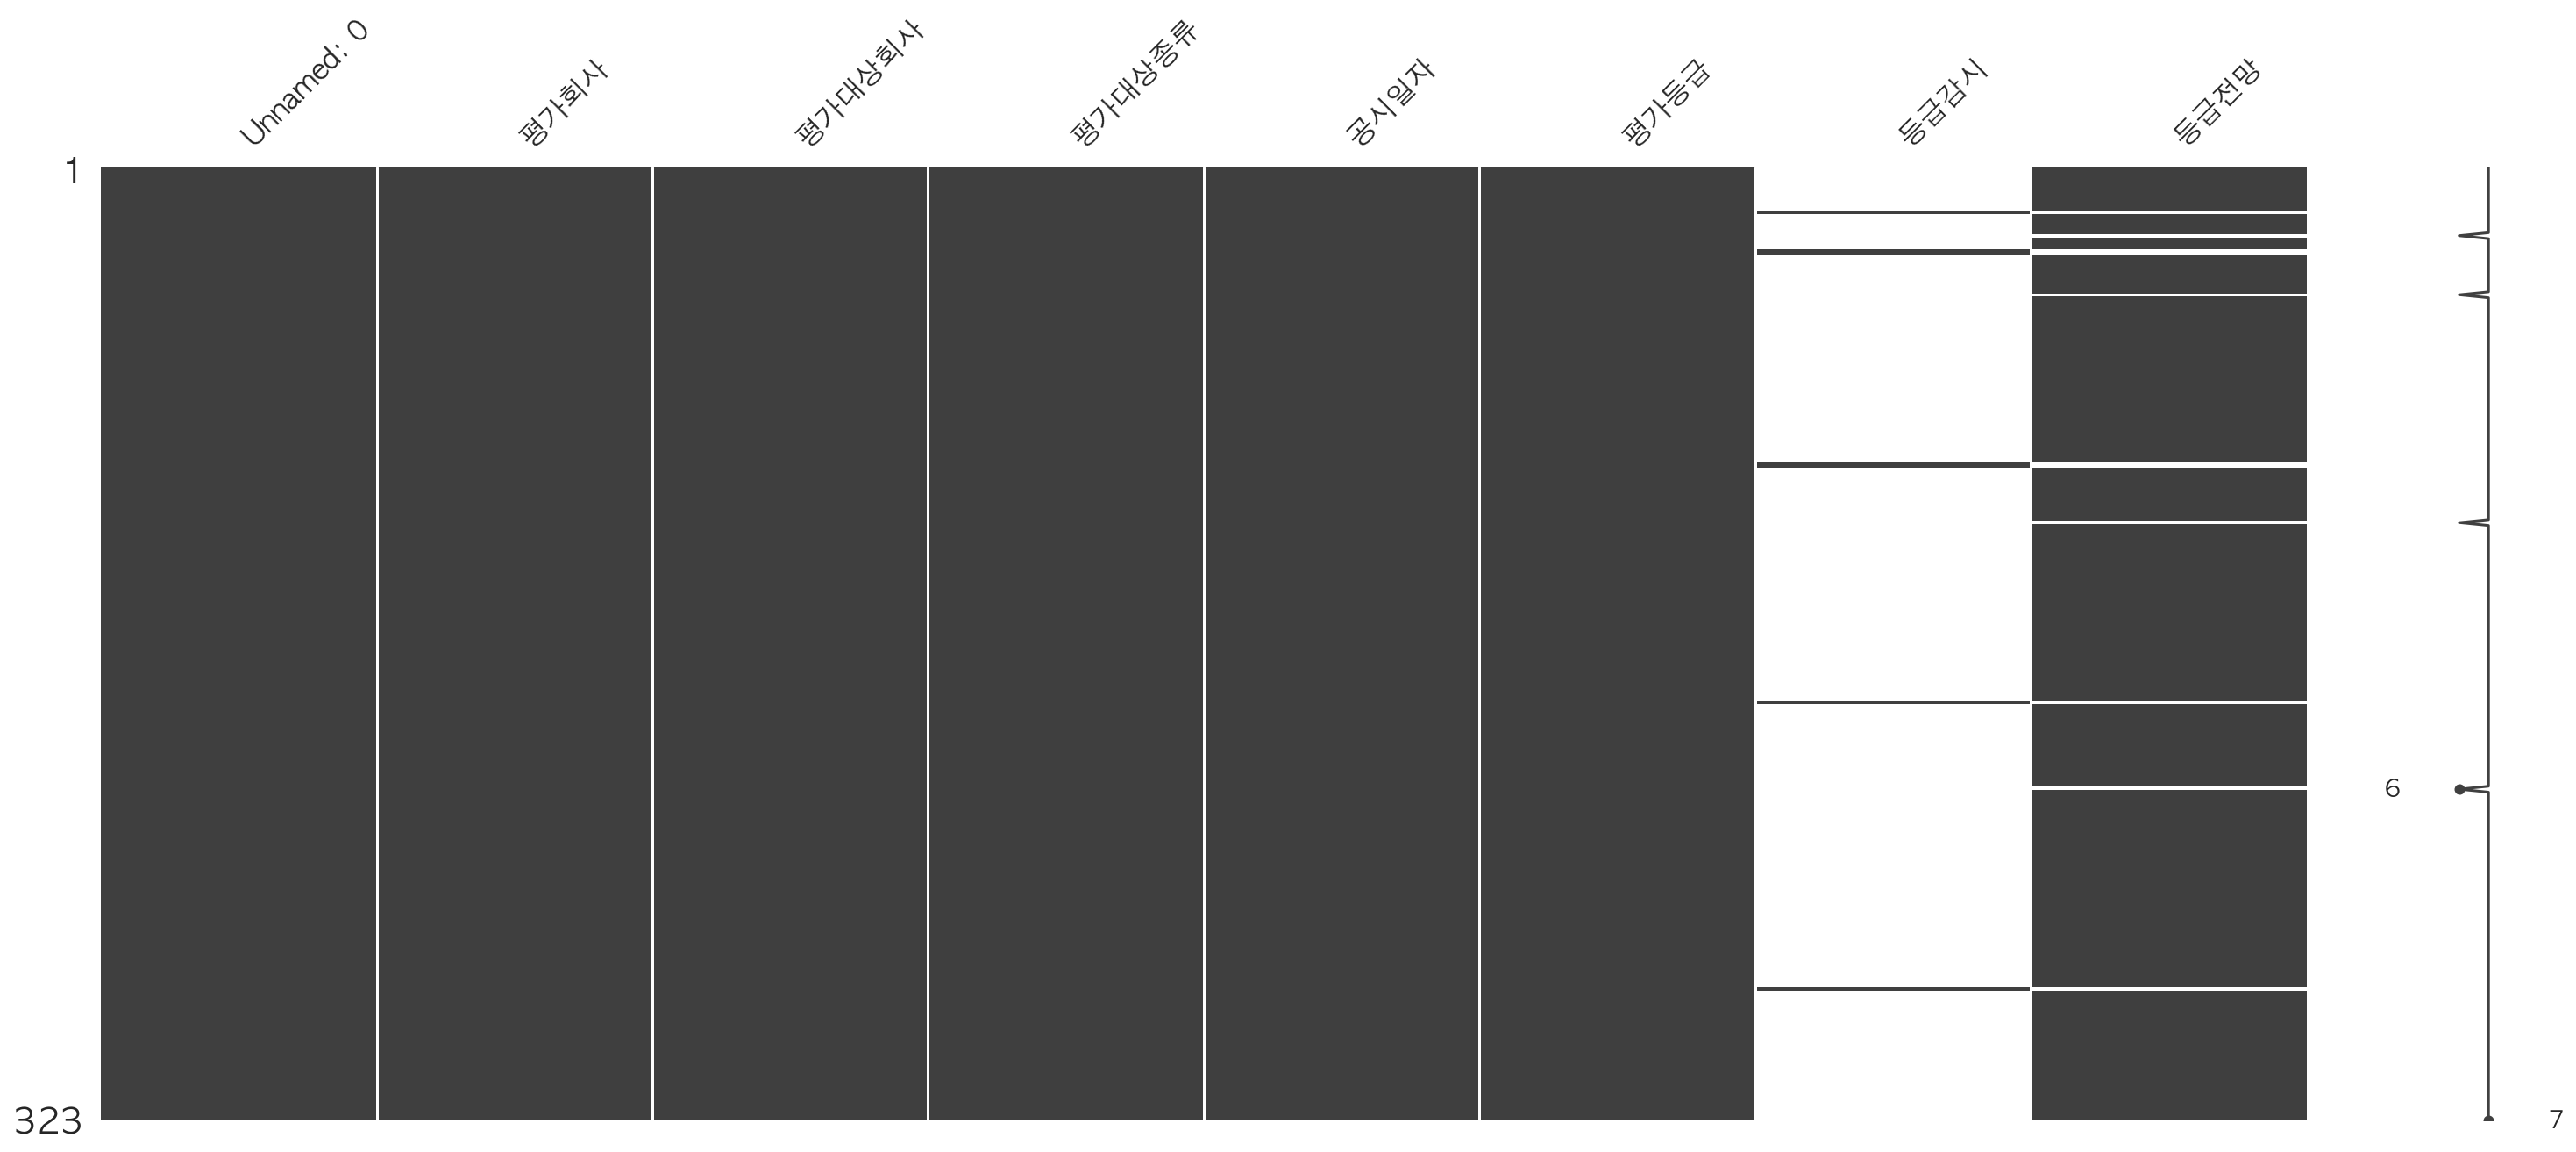

In [3]:
msno.matrix(df_credit_2020)
plt.show()

In [4]:
def screen_name(df):
    df = df.rename(columns = {"평가대상회사":"기업명"})
    df = df[["기업명","공시일자","평가등급"]]
    df["공시일자"] = df["공시일자"].apply(lambda x: int(str(x)[:4]))
    df["평가등급"][df["평가등급"] == "취소"] = np.nan
    df["기업명"] = df["기업명"].apply(lambda x: str(x).replace("(주)",""))
    df = df.dropna()
    df = df.drop_duplicates(['기업명'],keep="last").reset_index(drop=True)
    return df


def change_columns(df):
    columns = ["종목코드","기업명","결산월","단위","2019","2018","2017","2016","2015","2014"
               ,"2013","2012","2011","2010","2009","2008"]
    df.columns = columns
    df = df.rename(columns = {"종목코드":"기업코드"})
    return df


def merge_code(dfa,dfb):
    dfb = dfb[["기업코드","기업명"]][dfb["기업명"].isin(dfa["기업명"])]
    dfa = pd.merge(dfa,dfb, on="기업명",how="inner")
    return dfa


def name_change(df3):            
    return df3.rename(columns={'자산총계':"TA",'이자보상배율':'INTCOV','ROA':'ROA','ROE':'ROE',
                            '총자산_총자본':'EQTA','유동비율':'CURR','비유동부채_자산':'LTDTA',
                              '사회':'S','환경':'E','지배구조':'G', "당기순이익":'NI','자산총계':'TASSET',
                              '매출액':'Sale','부채비율':'DebtR','차입부채_EBITDA':'BTEBITDA','EBITDA_이자비용':'EBITDATIE',
                              '총차입부채':'TB','EBIT_매출액':'EBITTS'})

mod = sys.modules[__name__]

In [5]:
credit_ls_2017_2020= ["2017_credit_rating.xlsx","2018_credit_rating.xlsx",
            "2019_credit_rating.xlsx","2020_credit_rating.xlsx"]
    
for a in credit_ls_2017_2020:
    regex = re.compile(r'\d\d\d\d')
    b = regex.search(a).group() 
    setattr(mod, 'df_credit_{}'.format(b), screen_name(pd.read_excel(a)))

df_2013_2016_credit = pd.read_excel("2013-2016_credit_rating.xlsx")
df_2013_2016_credit.columns = ["nnamed", "평가회사","기업명","평가","평가대상종류","공시일자","평가등급","등급감시","등급전망"]
df_2013_2016_credit["공시일자"] = df_2013_2016_credit["공시일자"].apply(lambda x: int(str(x)[:4]))

for i in range(2013,2017):
    setattr(mod, 'df_credit_{}'.format(i),screen_name(df_2013_2016_credit[df_2013_2016_credit["공시일자"] == i]))

df_credit_2013.head()

,기업명,공시일자,평가등급
0,동국제강,2013,A
1,하나은행,2013,AAA
2,이수화학,2013,BBB
3,경남개발공사,2013,AA+
4,현대하이스코,2013,AA-


## ESG

In [6]:
df_esg = pd.read_csv("2011-2019-ESG.tsv", sep='\t')
df_esg.head()

,NO,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도,비고
0,6567,AJ네트웍스,95570,B,B,B,C이하,2019,NaN
1,6566,AJ렌터카,68400,C이하,C,B,B,2019,NaN
2,6565,AK홀딩스,6840,B,B,B,C이하,2019,NaN
3,6564,AP시스템,265520,C이하,B,C이하,C이하,2019,NaN
4,6563,BGF,27410,B,B,A,C이하,2019,NaN


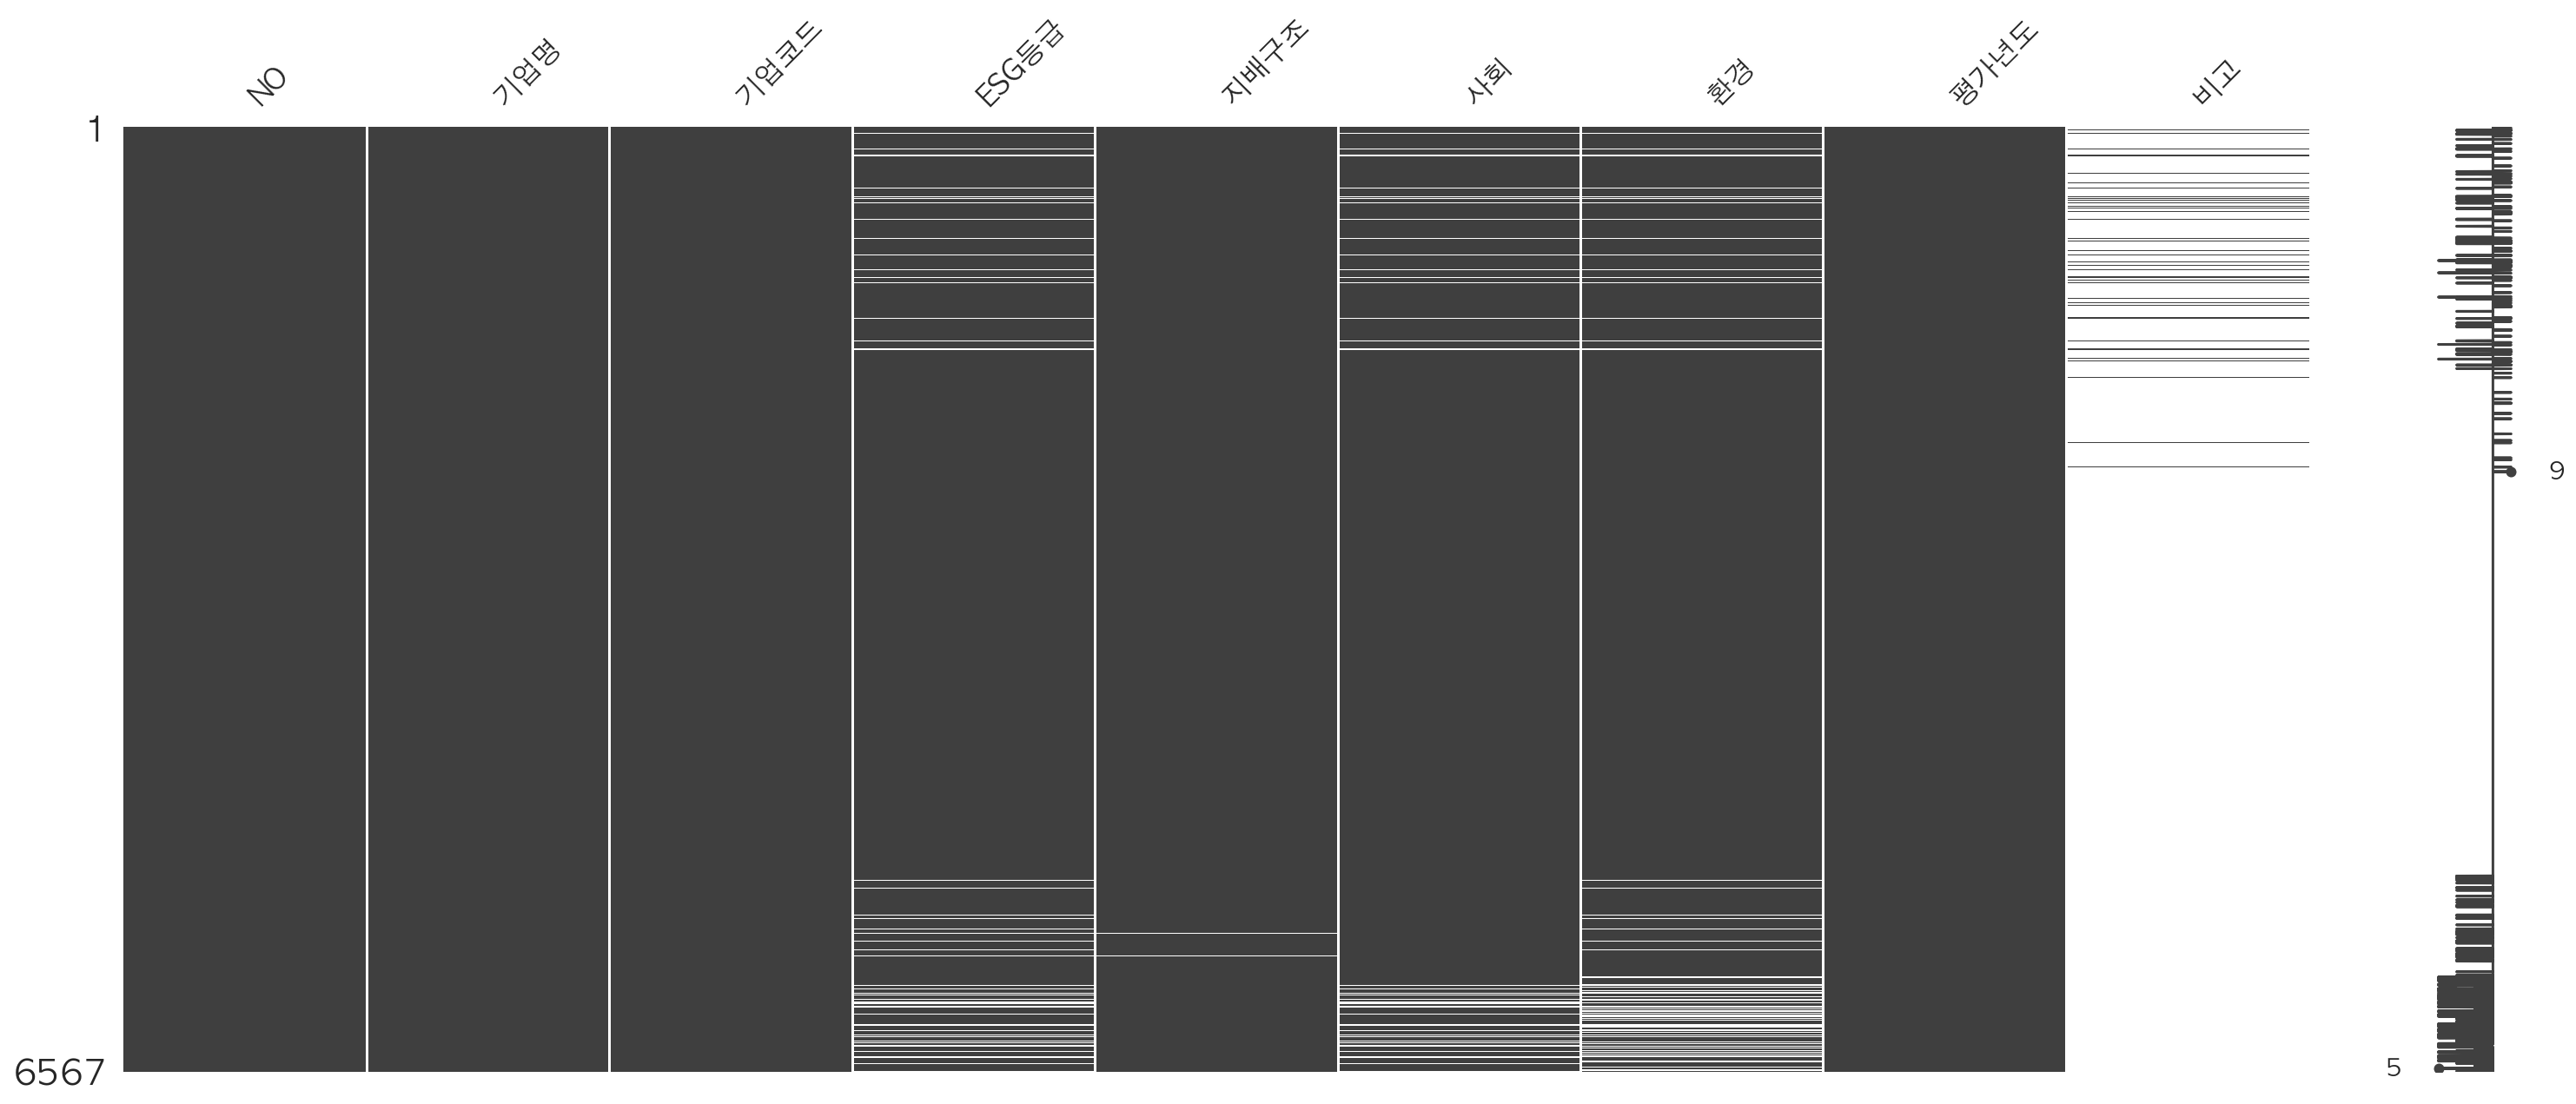

In [7]:
msno.matrix(df_esg)
plt.show()

In [8]:
df_esg = df_esg.drop(columns = ['NO', '비고']).dropna()
df_esg.기업코드 = df_esg.기업코드.apply(lambda x: str(x).zfill(6))

di = {"S":7,"A+":6,"A":5,"B+":4,"B":3,"B이하":2.5,"C":2,"C이하":1.5,"D":1}

df_esg.ESG등급 = list(map(di.get, df_esg.ESG등급))
df_esg.환경 = list(map(di.get, df_esg.환경))
df_esg.사회= list(map(di.get, df_esg.사회))
df_esg.지배구조= list(map(di.get, df_esg.지배구조))

mod = sys.modules[__name__]

for i in range(2011,2020):
    setattr(mod, 'df_esg_{}'.format(i),df_esg[df_esg["평가년도"]==i])
    
df_esg_2011.head()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
5904,AK홀딩스,006840,2.5,3.0,2.5,2.5,2011
5905,BYC,001460,2.5,3.0,2.5,2.5,2011
5908,CJ대한통운,000120,4.0,3.0,4.0,2.5,2011
5910,CJ제일제당,097950,4.0,4.0,4.0,5.0,2011
5914,DB손해보험,005830,5.0,5.0,5.0,4.0,2011


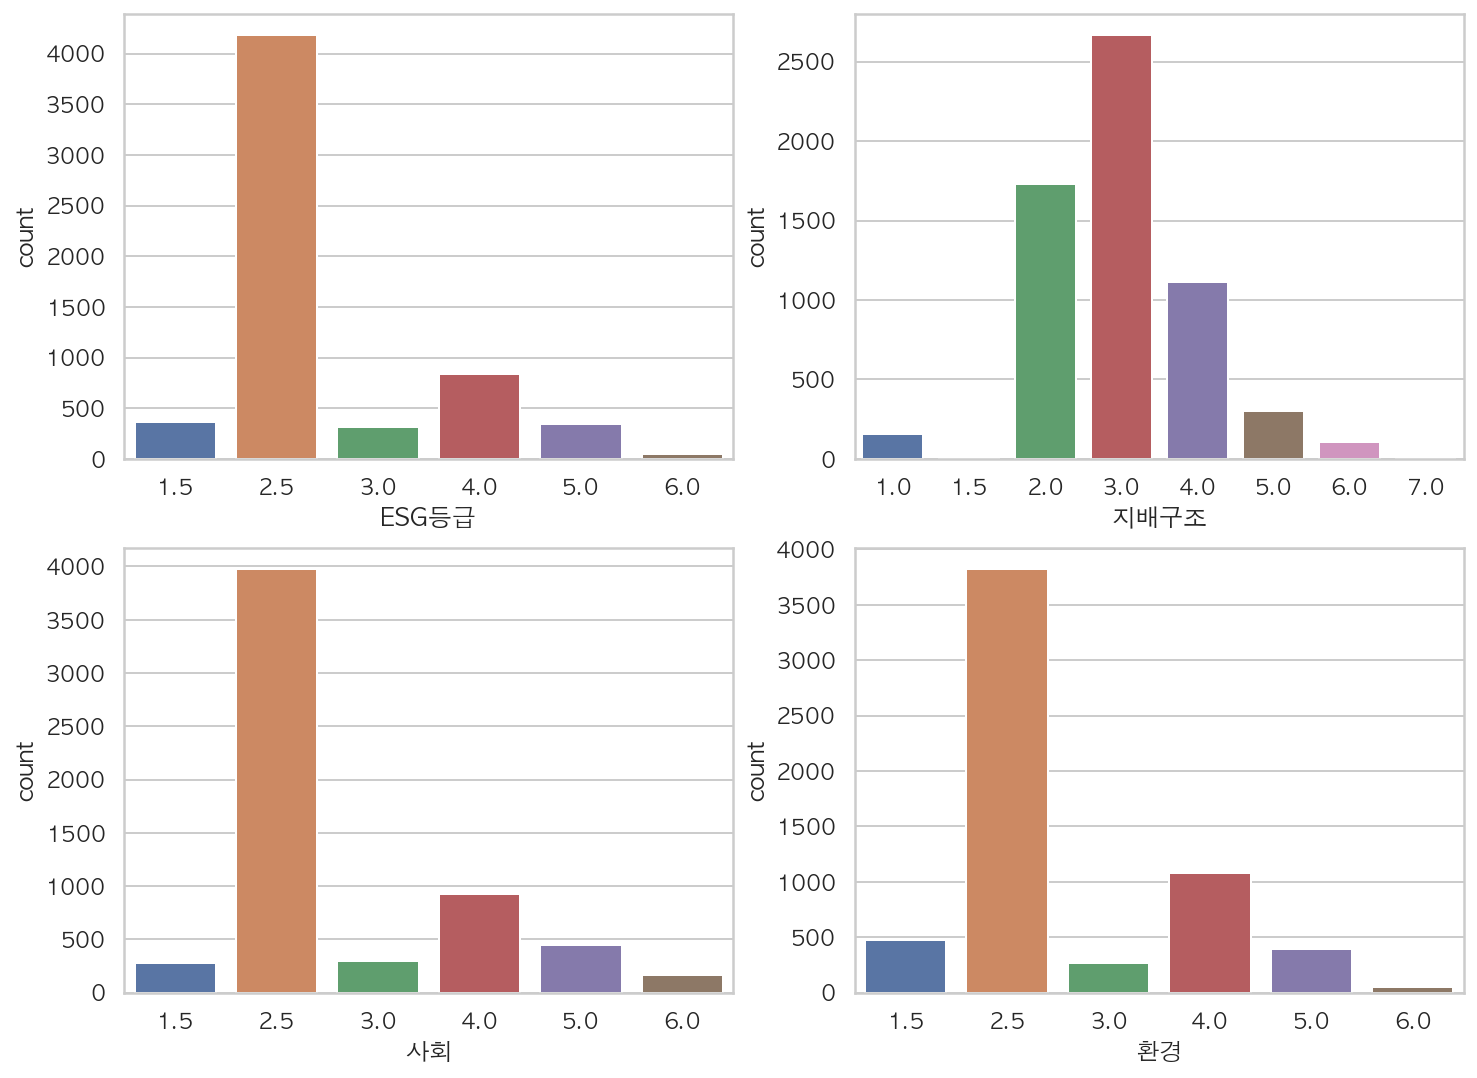

In [9]:
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
sns.countplot(x="ESG등급", data = df_esg.iloc[:,[2,3,4,5]])
plt.subplot(2,2,2)
sns.countplot(x="지배구조", data = df_esg.iloc[:,[2,3,4,5]])
plt.subplot(2,2,3)
sns.countplot(x="사회", data = df_esg.iloc[:,[2,3,4,5]])
plt.subplot(2,2,4)
sns.countplot(x="환경", data = df_esg.iloc[:,[2,3,4,5]])

plt.show()

## Balance Sheet

In [10]:
df_f = ["비유동부채.xlsx","자산총계.xlsx","이자보상배율.xlsx","ROA(당기순이익).xlsx","ROE(당기순이익).xlsx",
        "총자산_총자본.xlsx","유동비율.xlsx","영업활동현금흐름.xlsx","EBITDA.xlsx","CAPEX.xlsx","당기순이익.xlsx",
        "자산총계.xlsx","매출액.xlsx","EBIT.xlsx","부채비율.xlsx","차입부채_EBITDA.xlsx","EBITDA_이자비용.xlsx",
        "총차입부채.xlsx"]

for i in range(1,19):
    setattr(mod, 'df_balance_{}'.format(i), change_columns(pd.read_excel(df_f[i-1])[9:]))

balance_list = [df_balance_3, df_balance_4, df_balance_5, df_balance_6,df_balance_7,df_balance_8,df_balance_9,df_balance_10,df_balance_11,
               df_balance_12,df_balance_13,df_balance_14,df_balance_15,df_balance_16,df_balance_17]

for i in range(15): 
    balance_list[i][ (balance_list[i].values == "N/A(IFRS)") | (balance_list[i].values== '완전잠식')] = np.nan
    for k in range(4,15): 
        balance_list[i].iloc[:,k] = balance_list[i].iloc[:,k].apply(lambda x: float(str(x)))
        

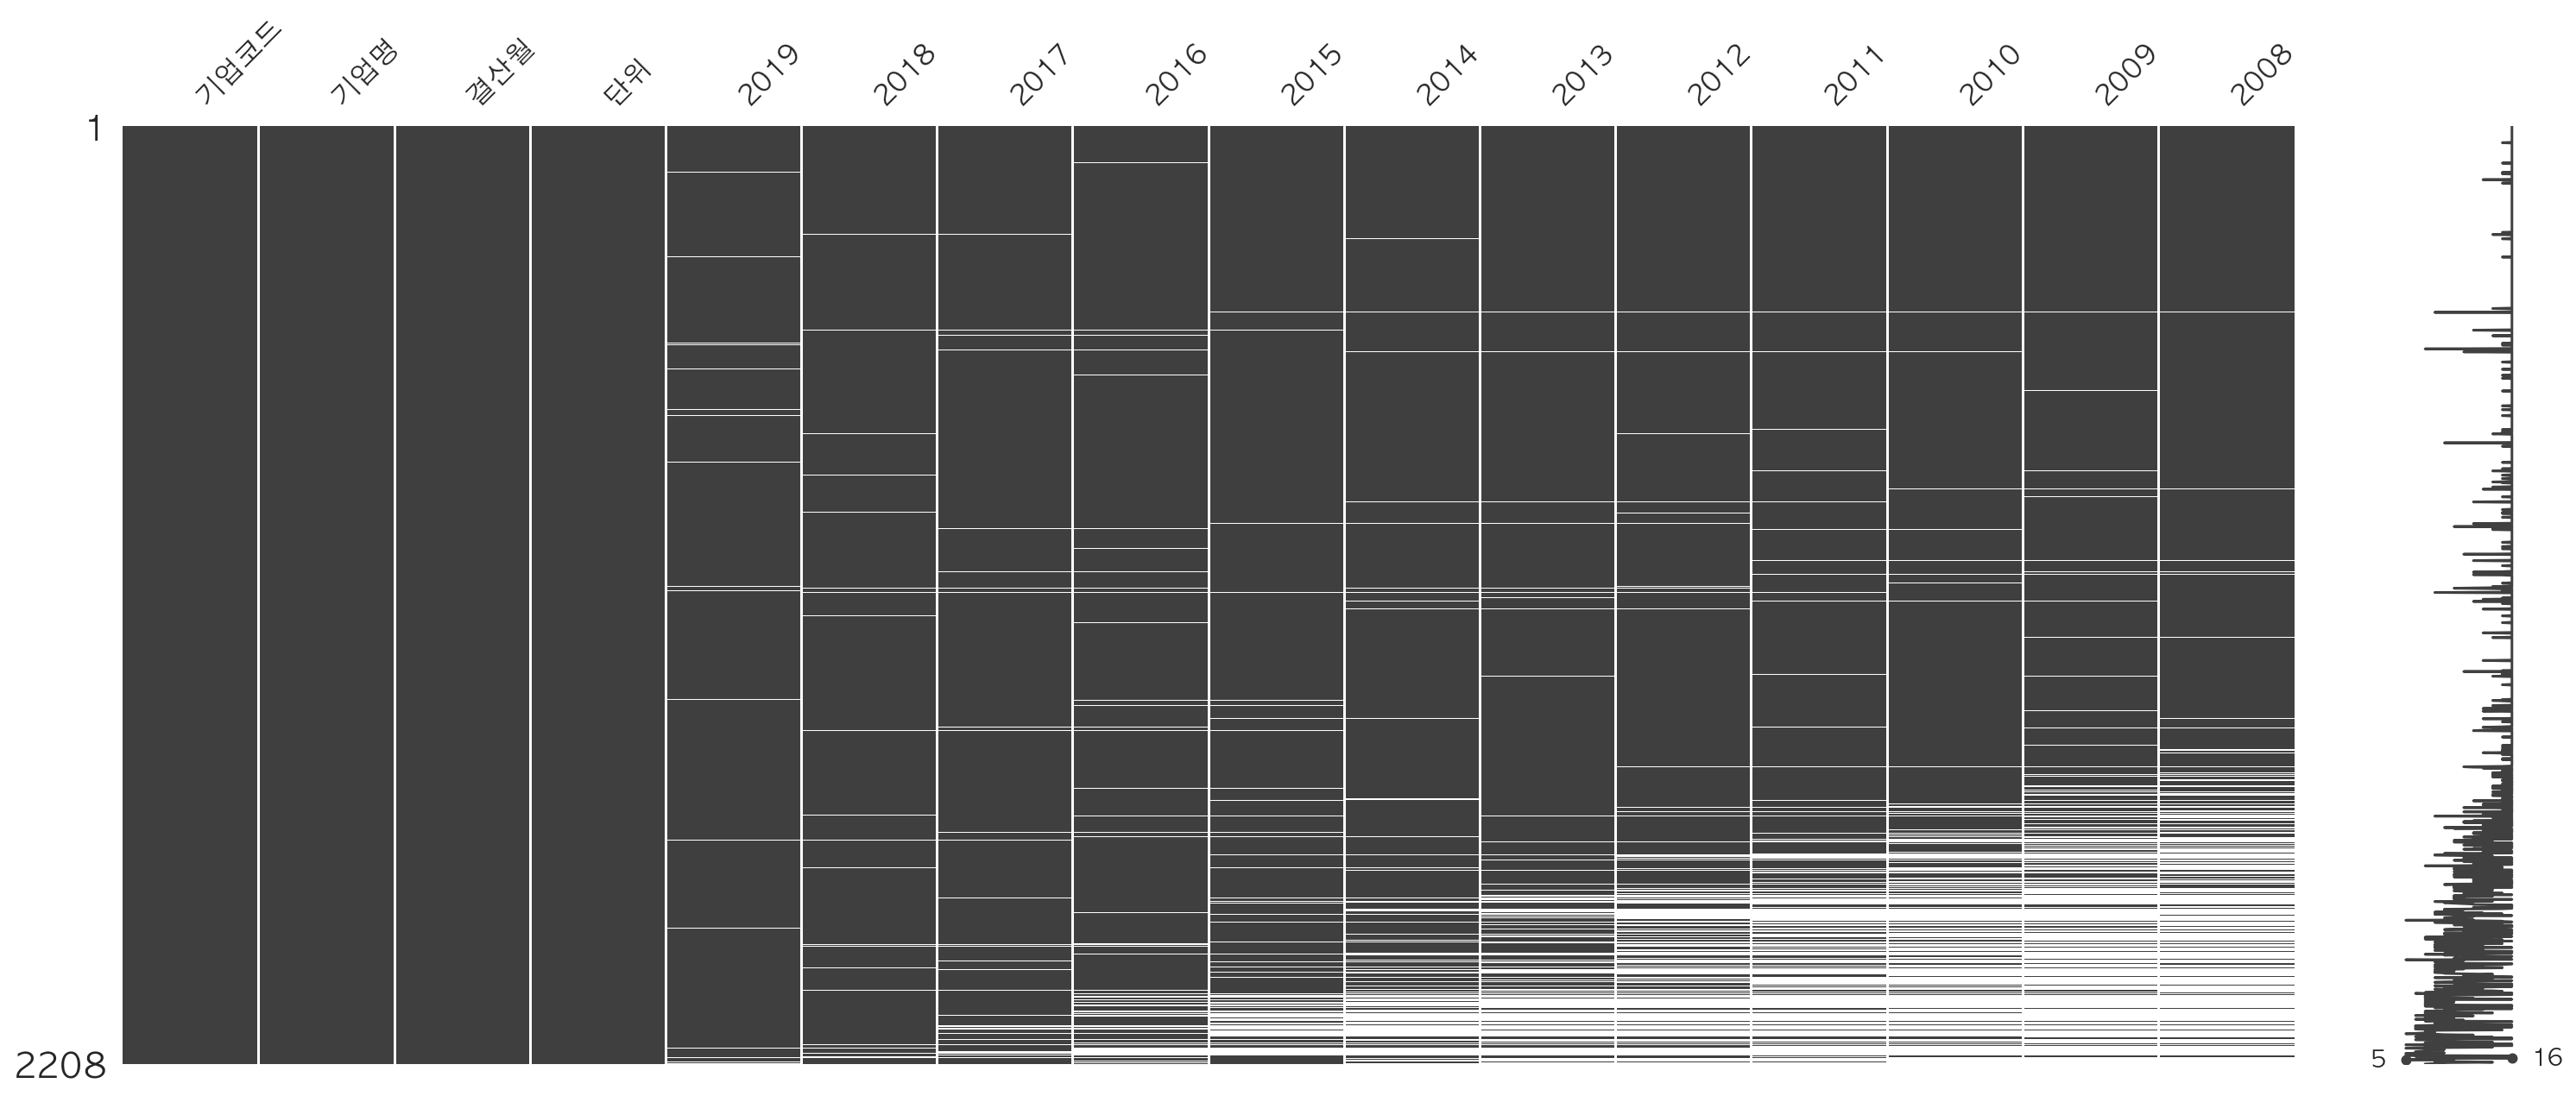

In [11]:
msno.matrix(df_balance_1)
plt.show()

In [12]:
list_credit = [df_credit_2013,df_credit_2014,df_credit_2015,df_credit_2016,df_credit_2017,
             df_credit_2018,df_credit_2019]

list_esg = [df_esg_2011,df_esg_2012,df_esg_2013,df_esg_2014,df_esg_2015,df_esg_2016,
            df_esg_2017,df_esg_2018,df_esg_2019]

list_balance = [df_balance_1,df_balance_2,df_balance_3,df_balance_4,df_balance_5,
               df_balance_6,df_balance_7,df_balance_8,df_balance_9,df_balance_10,
               df_balance_11,df_balance_12,df_balance_13,df_balance_14,df_balance_15,
               df_balance_16,df_balance_17,df_balance_18]


df_columns = ["기업코드","비유동부채","자산총계","이자보상배율","ROA","ROE","총자산_총자본","유동비율","영업활동현금흐름",
             "EBITDA","CAPEX","당기순이익","자산총계","매출액","EBIT","부채비율","차입부채_EBITDA","EBITDA_이자비용","총차입부채"]


for i in range(2013,2020):
    setattr(mod, 'df_rating_{}'.format(i), merge_code(list_credit[i-2013],list_esg[i-2013]))

for k in range(2011, 2020):
    for i in range(1,19):
        setattr(mod, 'df_{}_{}'.format(k,i), (pd.DataFrame(list_balance[i-1].iloc[:,[0,2023-k]]))) 

In [13]:
data_frames_2011 = [df_2011_1,df_2011_2,df_2011_3,df_2011_4,df_2011_5,df_2011_6,df_2011_7,df_2011_8,df_2011_9,df_2011_10,
                   df_2011_11,df_2011_12,df_2011_13,df_2011_14,df_2011_15,df_2011_16,df_2011_17,df_2011_18]
df_merged_2011 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2011).dropna()
df_merged_2011.columns = df_columns

data_frames_2012 = [df_2012_1,df_2012_2,df_2012_3,df_2012_4,df_2012_5,df_2012_6,df_2012_7,df_2012_8,df_2012_9,df_2012_10,
                   df_2012_11,df_2012_12,df_2012_13,df_2012_14,df_2012_15,df_2012_16,df_2012_17,df_2012_18]
df_merged_2012 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2012).dropna()
df_merged_2012.columns = df_columns

data_frames_2013 = [df_2013_1,df_2013_2,df_2013_3,df_2013_4,df_2013_5,df_2013_6,df_2013_7,df_2013_8,df_2013_9,df_2013_10,
                   df_2013_11,df_2013_12,df_2013_13,df_2013_14,df_2013_15,df_2013_16,df_2013_17,df_2013_18]
df_merged_2013 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2013).dropna()
df_merged_2013.columns = df_columns

data_frames_2014 = [df_2014_1,df_2014_2,df_2014_3,df_2014_4,df_2014_5,df_2014_6,df_2014_7,df_2014_8,df_2014_9,df_2014_10,
                   df_2014_11,df_2014_12,df_2014_13,df_2014_14,df_2014_15,df_2014_16,df_2014_17,df_2014_18]
df_merged_2014 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2014).dropna()
df_merged_2014.columns = df_columns

data_frames_2015 = [df_2015_1,df_2015_2,df_2015_3,df_2015_4,df_2015_5,df_2015_6,df_2015_7,df_2015_8,df_2015_9,df_2015_10,
                   df_2015_11,df_2015_12,df_2015_13,df_2015_14,df_2015_15,df_2015_16,df_2015_17,df_2015_18]
df_merged_2015 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2015).dropna()
df_merged_2015.columns = df_columns

data_frames_2016 = [df_2016_1,df_2016_2,df_2016_3,df_2016_4,df_2016_5,df_2016_6,df_2016_7,df_2016_8,df_2016_9,df_2016_10,
                   df_2016_11,df_2016_12,df_2016_13,df_2016_14,df_2016_15,df_2016_16,df_2016_17,df_2016_18]
df_merged_2016 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2016).dropna()
df_merged_2016.columns = df_columns

data_frames_2017 = [df_2017_1,df_2017_2,df_2017_3,df_2017_4,df_2017_5,df_2017_6,df_2017_7,df_2017_8,df_2017_9,df_2017_10,
                   df_2017_11,df_2017_12,df_2017_13,df_2017_14,df_2017_15,df_2017_16,df_2017_17,df_2017_18]
df_merged_2017 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2017).dropna()
df_merged_2017.columns = df_columns

data_frames_2018 = [df_2018_1,df_2018_2,df_2018_3,df_2018_4,df_2018_5,df_2018_6,df_2018_7,df_2018_8,df_2018_9,df_2018_10,
                   df_2018_11,df_2018_12,df_2018_13,df_2018_14,df_2018_15,df_2018_16,df_2018_17,df_2018_18]
df_merged_2018 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2018).dropna()
df_merged_2018.columns = df_columns

data_frames_2019 = [df_2019_1,df_2019_2,df_2019_3,df_2019_4,df_2019_5,df_2019_6,df_2019_7,df_2019_8,df_2019_9,df_2019_10,
                   df_2019_11,df_2019_12,df_2019_13,df_2019_14,df_2019_15,df_2019_16,df_2019_17,df_2019_18]
df_merged_2019 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2019).dropna()
df_merged_2019.columns = df_columns

In [14]:
df_merged_2011.columns

Index(['기업코드', '비유동부채', '자산총계', '이자보상배율', 'ROA', 'ROE',
       '총자산_총자본', '유동비율', '영업활동현금흐름', 'EBITDA', 'CAPEX',
       '당기순이익', '자산총계', '매출액', 'EBIT', '부채비율', '차입부채_EBITDA', 'EBITDA_이자비용',
       '총차입부채'],
      dtype='object')

In [15]:
list_merge = [df_merged_2011,df_merged_2012,df_merged_2013,df_merged_2014,df_merged_2015,df_merged_2016,df_merged_2017,
             df_merged_2018,df_merged_2019]

for i in range(2011,2020):
    list_merge[i-2011]["비유동부채_자산"] = list_merge[i-2011]['비유동부채']/list_merge[i-2011]['자산총계']
    list_merge[i-2011]['총자산_총자본'] = list_merge[i-2011]['총자산_총자본'].apply(lambda x: np.reciprocal(x))
    list_merge[i-2011]["FCF"] = list_merge[i-2011]['영업활동현금흐름'] - list_merge[i-2011]["CAPEX"]
    list_merge[i-2011]["EBIT_매출액"] = list_merge[i-2011]["EBIT"]/list_merge[i-2011]["매출액"]
    list_merge[i-2011]["자산총계"] = list_merge[i-2011]["자산총계"].apply(lambda x: np.log(x))
    list_merge[i-2011]["비유동부채_자산"] = list_merge[i-2011]["비유동부채_자산"].apply(lambda x: np.log(x))
    list_merge[i-2011]["유동비율"] = list_merge[i-2011]["유동비율"].apply(lambda x: np.log(x))
    list_merge[i-2011]["이자보상배율"] = list_merge[i-2011]["이자보상배율"].apply(lambda x: np.log(x))

    setattr(mod, 'df_merged_b_{}'.format(i), name_change(pd.merge(list_merge[i-2011], \
                                                list_esg[i-2011],on=['기업코드'], how='inner')).iloc[:,[0,3,4,5,6,7,9,11,12,13,
                                                                                               15,16,17,18,19,20,21,23,26,25,24]])

In [16]:
df_merged_b_2012.head(2)

,기업코드,INTCOV,ROA,ROE,EQTA,CURR,EBITDA,NI,TASSET,Sale,...,BTEBITDA,EBITDATIE,TB,LTDTA,FCF,EBITTS,ESG등급,E,S,G
0,000020,2.248129,0.40,0.57,0.007000,4.988867,22203932.0,1311241.0,3.242847e+08,223371997.0,...,0.45,21.03,10000000.0,-3.094445,18465809.0,0.044781,2.5,2.5,2.5,4.0
1,000050,-1.021651,-0.59,-1.27,0.005145,4.317221,30340204.0,-7910168.0,1.335040e+09,333620804.0,...,13.69,1.64,415319276.0,-0.887915,-20187568.0,0.021743,2.5,2.5,2.5,3.0


## DataFrame Merge

In [17]:
df_total_2013 = pd.merge(df_rating_2013, df_merged_b_2012, on="기업코드", how="inner")
df_total_2014 = pd.merge(df_rating_2014, df_merged_b_2013, on="기업코드", how="inner")
df_total_2015 = pd.merge(df_rating_2015, df_merged_b_2014, on="기업코드", how="inner")
df_total_2016 = pd.merge(df_rating_2016, df_merged_b_2015, on="기업코드", how="inner")
df_total_2017 = pd.merge(df_rating_2017, df_merged_b_2016, on="기업코드", how="inner")
df_total_2018 = pd.merge(df_rating_2018, df_merged_b_2017, on="기업코드", how="inner")
df_total_2019 = pd.merge(df_rating_2019, df_merged_b_2018, on="기업코드", how="inner")
df_rating_2020 = merge_code(df_credit_2020, df_esg_2019)
df_total_2020 = pd.merge(df_rating_2020, df_merged_b_2019, on="기업코드", how="inner")

In [18]:
df_sum_2013_2020 = pd.concat([df_total_2013, df_total_2014,df_total_2015,df_total_2016,df_total_2017,\
                              df_total_2018,df_total_2019,df_total_2020]).replace(np.inf,np.nan).dropna().reset_index(drop=True)

df_sum_2013_2020 = df_sum_2013_2020.drop(columns = ["ESG등급"]).replace(-np.inf,np.nan).dropna()

In [19]:
df_sum_2013_2020.describe()

,공시일자,INTCOV,ROA,ROE,EQTA,CURR,EBITDA,NI,TASSET,Sale,DebtR,BTEBITDA,EBITDATIE,TB,LTDTA,FCF,EBITTS,E,S,G
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,592.000000,592.000000,592.000000,5.920000e+02,592.000000,5.920000e+02,592.000000,592.000000,592.000000,592.000000
mean,2016.557432,1.522955,2.689358,4.794561,0.005127,4.791605,7.601213e+08,2.470672e+08,1.186626e+10,7.601724e+09,322.253699,4.984561,231.276385,3.592892e+09,-1.787610,1.124981e+08,0.057989,3.568412,3.568412,3.177365
std,1.910009,1.378448,4.130046,14.918413,0.001717,0.506596,1.954445e+09,9.737313e+08,2.937738e+10,1.457664e+10,3472.836125,4.005283,2537.844722,9.381230e+09,0.709439,1.072161e+09,0.046678,1.020914,1.156881,1.032776
min,2013.000000,-2.995732,-27.740000,-131.840000,0.000111,2.881443,3.283844e+06,-1.700810e+09,7.304061e+07,6.905978e+07,19.300000,0.000000,0.070000,0.000000e+00,-5.954459,-8.178719e+09,0.000638,1.500000,1.500000,1.000000
25%,2015.000000,0.754946,0.560000,1.467500,0.004051,4.495634,6.055704e+07,8.981458e+06,8.261425e+08,8.052612e+08,77.822500,2.330000,3.940000,1.828617e+08,-2.077819,-3.762442e+07,0.027826,2.500000,2.500000,2.000000
50%,2017.000000,1.453950,2.395000,5.415000,0.005153,4.806068,1.815746e+08,4.414128e+07,2.220103e+09,1.900377e+09,128.045000,4.195000,8.050000,6.727049e+08,-1.669245,2.281352e+07,0.047379,4.000000,4.000000,3.000000
75%,2018.000000,2.240708,4.735000,9.812500,0.006302,5.095419,5.111400e+08,1.434015e+08,8.192147e+09,6.574458e+09,192.815000,6.510000,14.290000,2.395268e+09,-1.349638,1.421855e+08,0.073755,4.000000,4.000000,4.000000
max,2020.000000,9.928505,32.010000,81.200000,0.009473,6.265168,2.096259e+10,1.341637e+10,1.822862e+11,9.681261e+10,84510.240000,32.690000,43793.290000,7.344402e+10,-0.450623,9.551097e+09,0.334259,6.000000,6.000000,6.000000


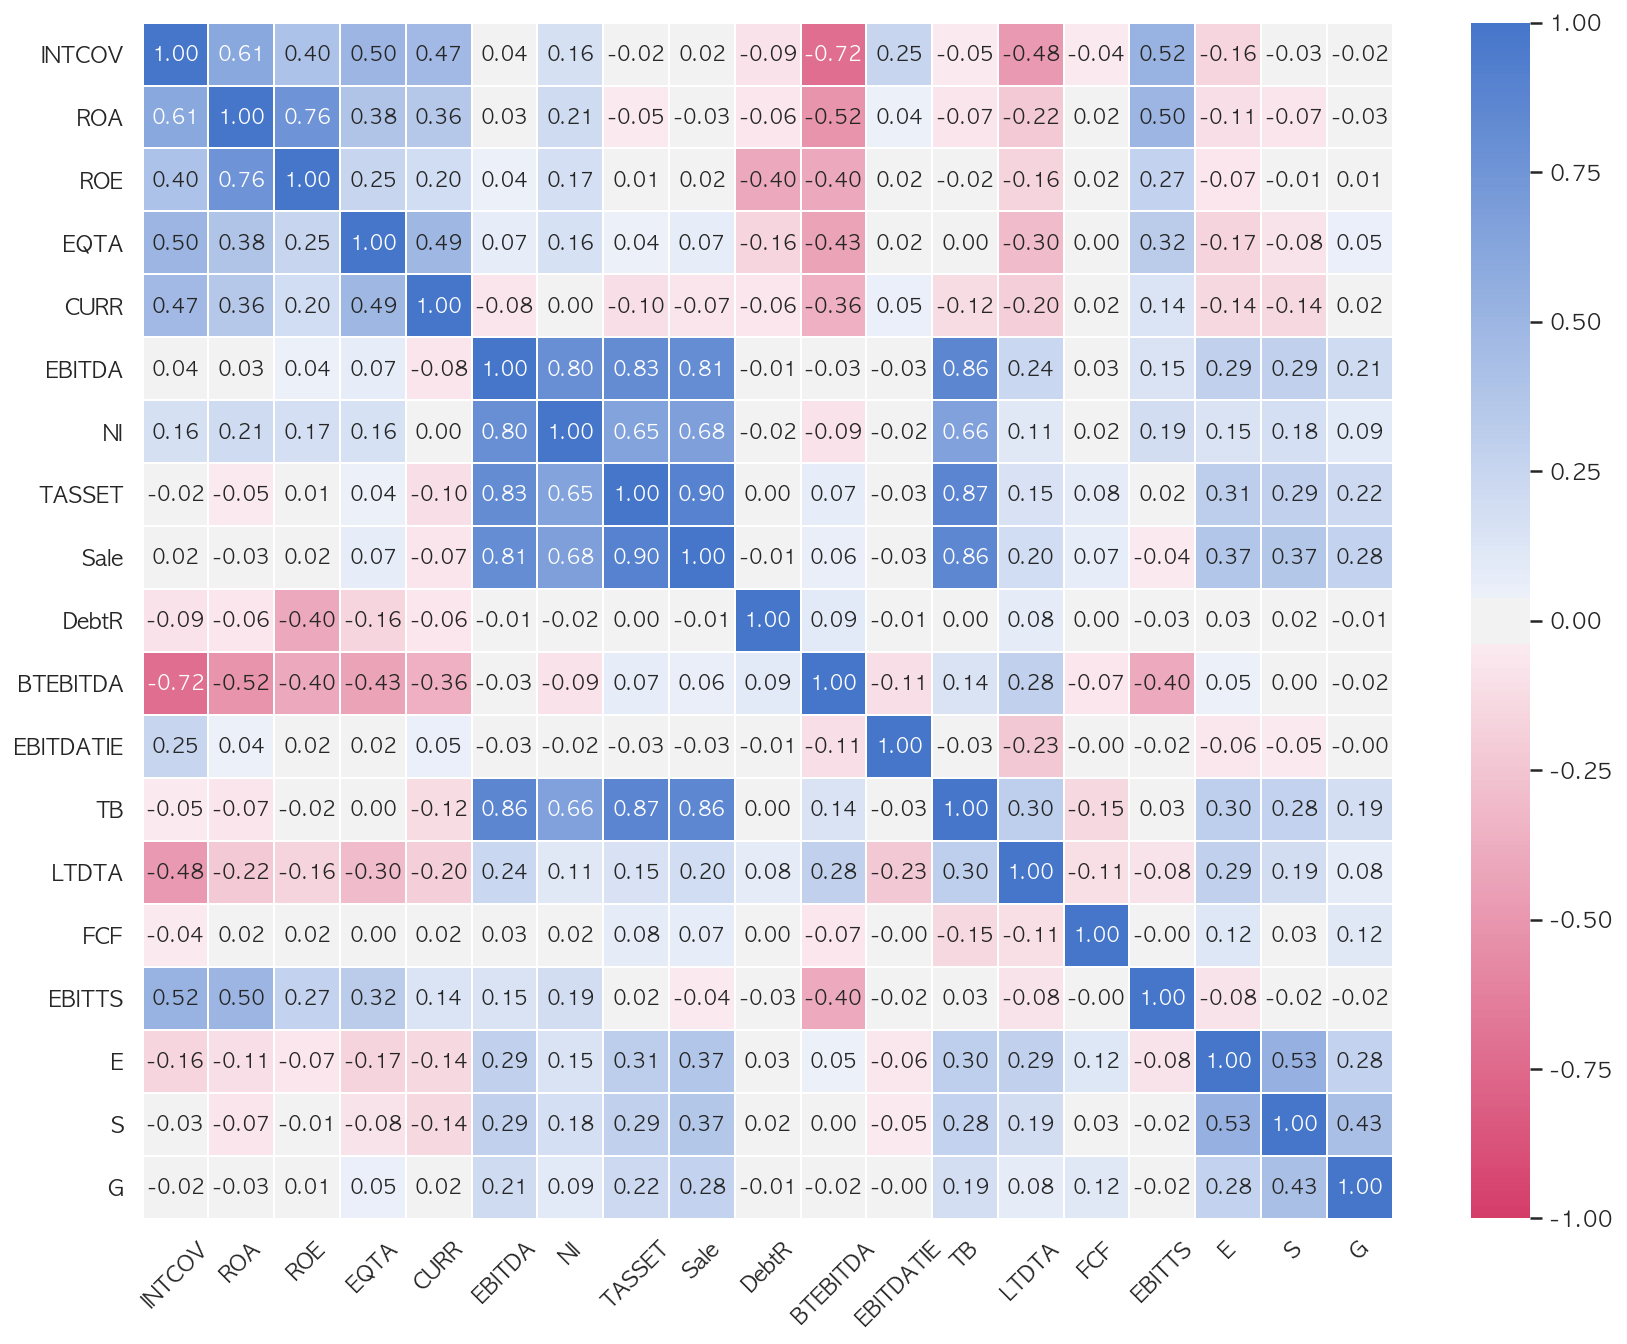

In [20]:
plt.figure(figsize=(14,11))
sns.heatmap(data = df_sum_2013_2020.iloc[:,4:].corr(), annot=True,vmin=-1,annot_kws={"size": 10},
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(0, 255, n=256))
plt.xticks(rotation=45, size =11)
plt.show()

In [21]:
# plt.figure(figsize=(5,5))
# sns.pairplot(df_sum_2013_2020.iloc[:,4:-4])
# plt.show()

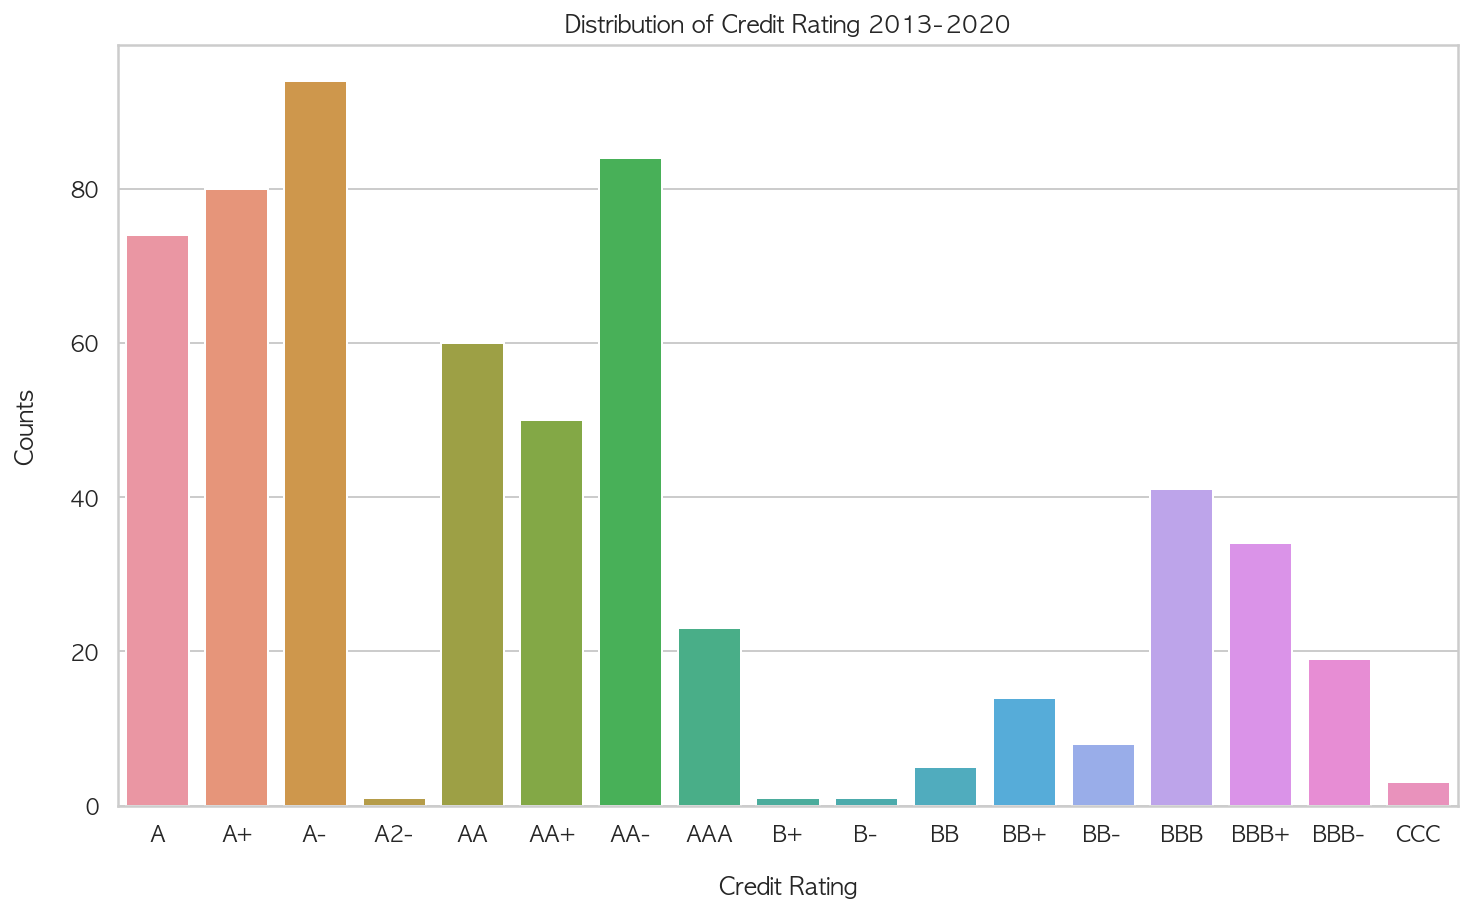

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(df_sum_2013_2020["평가등급"].sort_values())
plt.title("Distribution of Credit Rating 2013-2020")
plt.xlabel("Credit Rating",labelpad=15)
plt.ylabel("Counts",labelpad=16)
plt.show()

In [23]:
#원상희, 전봉걸 (2012) 기업의 신용등급이 성과 및 활동성에 미치는 영향 분석

credit_dlist={"CCC":4,"B-":5,"B+":5,"BB-":6,"BB":6,"BB+":6,"BBB-":7,"BBB":7,"BBB+":7,
              "A-":8,"A":8,"A+":8,"A2-":9,"AA-":9,"AA":9,"AA+":9,"AAA":10}

df_sum_2013_2020['평가등급'] = df_sum_2013_2020['평가등급'].apply(credit_dlist.get)

In [24]:
df_sum_2013_2020.head(2)

,기업명,공시일자,평가등급,기업코드,INTCOV,ROA,ROE,EQTA,CURR,EBITDA,...,DebtR,BTEBITDA,EBITDATIE,TB,LTDTA,FCF,EBITTS,E,S,G
0,이수화학,2013,7,005950,0.667829,1.20,3.23,0.005647,4.793142,81429733.0,...,176.50,7.17,2.88,5.840666e+08,-1.509078,-41842604.0,0.028316,4.0,2.5,3.0
1,현대산업개발,2013,8,012630,0.039221,0.08,0.22,0.004451,5.226177,143650462.0,...,173.43,18.13,1.19,2.603668e+09,-1.386164,-194911101.0,0.031021,2.5,2.5,4.0


In [25]:
X = df_sum_2013_2020.iloc[:,4:]
Y = df_sum_2013_2020.iloc[:,2]

In [26]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.179879,EBITDATIE
1,1.409745,FCF
2,1.539396,DebtR
3,3.599527,NI
4,4.152711,ROE
5,4.710517,EBITTS
6,6.245981,BTEBITDA
7,6.597544,ROA
8,8.740997,EBITDA
9,9.371110,TASSET


In [27]:
robust_scaler =RobustScaler()
rb = robust_scaler.fit(X)
output = robust_scaler.transform(X)
output = pd.DataFrame(output, columns=X.columns, index=list(X.index.values))
output["Y"] = Y
output.describe()

,INTCOV,ROA,ROE,EQTA,CURR,EBITDA,NI,TASSET,Sale,DebtR,BTEBITDA,EBITDATIE,TB,LTDTA,FCF,EBITTS,E,S,G,Y
count,592.000000,592.000000,592.000000,592.000000,5.920000e+02,592.000000,592.000000,592.000000,592.000000,5.920000e+02,592.000000,592.000000,592.000000,5.920000e+02,592.000000,5.920000e+02,592.000000,592.000000,592.000000,592.000000
mean,0.046444,0.070505,-0.074349,-0.011200,-2.411287e-02,1.283996,1.509640,1.309550,0.988239,1.688881e+00,0.188890,21.567767,1.319915,-1.625496e-01,0.498774,2.310228e-01,-0.287725,-0.287725,0.088682,8.126689
std,0.927771,0.989233,1.787707,0.762726,8.446299e-01,4.337593,7.243942,3.988238,2.526633,3.020054e+01,0.958202,245.202389,4.240284,9.742628e-01,5.962747,1.016306e+00,0.680610,0.771254,0.516388,0.960734
min,-2.994881,-7.217964,-16.447573,-2.239695,-3.208858e+00,-0.395689,-12.981329,-0.291483,-0.317430,-9.456704e-01,-1.003589,-0.771014,-0.304060,-5.884822e+00,-45.612235,-1.017661e+00,-1.666667,-1.666667,-1.000000,4.000000
25%,-0.470469,-0.439521,-0.473038,-0.489436,-5.175750e-01,-0.268580,-0.261567,-0.189242,-0.189821,-4.367459e-01,-0.446172,-0.397101,-0.221407,-5.610888e-01,-0.336121,-4.257119e-01,-1.000000,-1.000000,-0.500000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,7.404017e-16,0.000000,0.000000,0.000000,0.000000,-1.235990e-16,0.000000,0.000000,0.000000,-1.524388e-16,0.000000,7.556889e-17,0.000000,0.000000,0.000000,8.000000
75%,0.529531,0.560479,0.526962,0.510564,4.824250e-01,0.731420,0.738433,0.810758,0.810179,5.632541e-01,0.553828,0.602899,0.778593,4.389112e-01,0.663879,5.742881e-01,0.000000,0.000000,0.500000,9.000000
max,5.703842,7.093413,9.081486,1.919492,2.432705e+00,46.120283,99.480908,24.445555,16.451551,7.338061e+02,6.816986,4230.457971,32.892389,1.673516e+00,52.990865,6.246146e+00,1.333333,1.333333,1.500000,10.000000


## OLS Regression

In [28]:
model = sm.OLS.from_formula("Y ~DebtR+TASSET+INTCOV+ROE+EQTA+LTDTA",data=output)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     77.53
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           4.01e-71
Time:                        18:40:26   Log-Likelihood:                -642.60
No. Observations:                 592   AIC:                             1299.
Df Residuals:                     585   BIC:                             1330.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0944      0.032    252.366      0.0

In [29]:
model = sm.OLS.from_formula("Y ~CURR+DebtR+TASSET+INTCOV+ROE+EQTA+LTDTA+E+S+G ",data=output)
result = model.fit()
print(result.summary())#DebtR+EBITTS+TASSET+INTCOV+ROE+EQTA+LTDTA+E+S+G

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     55.00
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           1.61e-77
Time:                        18:40:26   Log-Likelihood:                -618.63
No. Observations:                 592   AIC:                             1259.
Df Residuals:                     581   BIC:                             1307.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1315      0.037    222.510      0.0

In [30]:
#DebtR+EBITTS+INTCOV+ROE+EQTA+LTDTA

In [31]:
output.head()

,INTCOV,ROA,ROE,EQTA,CURR,EBITDA,NI,TASSET,Sale,DebtR,BTEBITDA,EBITDATIE,TB,LTDTA,FCF,EBITTS,E,S,G,Y
0,-0.529103,-0.286228,-0.261833,0.219552,-0.021550,-0.222256,-0.216817,-0.123701,0.058295,0.421375,0.711722,-0.499517,-0.040064,0.219955,-0.359580,-0.415055,0.000000,-1.000000,0.0,7
1,-0.952191,-0.554491,-0.622528,-0.311904,0.700432,-0.084167,-0.288882,0.599830,0.248505,0.394678,3.333732,-0.662802,0.872789,0.388751,-1.210860,-0.356145,-1.000000,-1.000000,0.5,8
2,-0.469677,0.221557,0.906531,-1.067484,-1.675561,-0.317123,-0.221461,-0.243854,-0.219614,1.173859,-0.005981,-0.309179,-0.231184,-0.715409,0.034576,-0.449814,0.000000,-1.000000,-0.5,7
3,-0.645631,-2.623952,-5.713002,-1.435300,-1.178868,-0.226477,-1.242498,-0.066054,-0.085156,4.984716,0.125598,-0.498551,-0.134517,-0.806510,1.420684,-0.245136,0.000000,0.000000,0.0,4
4,-1.501235,-0.995210,-1.377472,-0.703325,0.026250,-0.139399,-0.767896,0.134912,-0.150562,1.052982,1.139952,-0.634783,0.176653,-0.005962,2.912933,-0.042014,0.666667,0.666667,0.0,5


In [32]:
#ESG 포함

df_train = output.iloc[:411, [0,2,3,7,9,13,16,17,18]]#1,3,9,10,13,16,17,18
df_test = output.iloc[412:, [0,2,3,7,9,13,16,17,18]]
y_train = output.iloc[:411, -1]
y_test = output.iloc[412:, -1]

# ESG 제거

df_train3 = output.iloc[:411, [0,2,3,7,9,13]]
df_test3 = output.iloc[412:, [0,2,3,7,9,13,]]

y_sample = list(y_test)

In [33]:
regr = linear_model.LinearRegression()
regr.fit(df_train, y_train)
y_pred = regr.predict(df_test)

regr3 = linear_model.LinearRegression()
regr3.fit(df_train3, y_train)
y_pred3 = regr3.predict(df_test3)

for i in range(180):
    y_pred[i] = round(y_pred[i], 0)
    y_pred3[i] = round(y_pred3[i], 0)

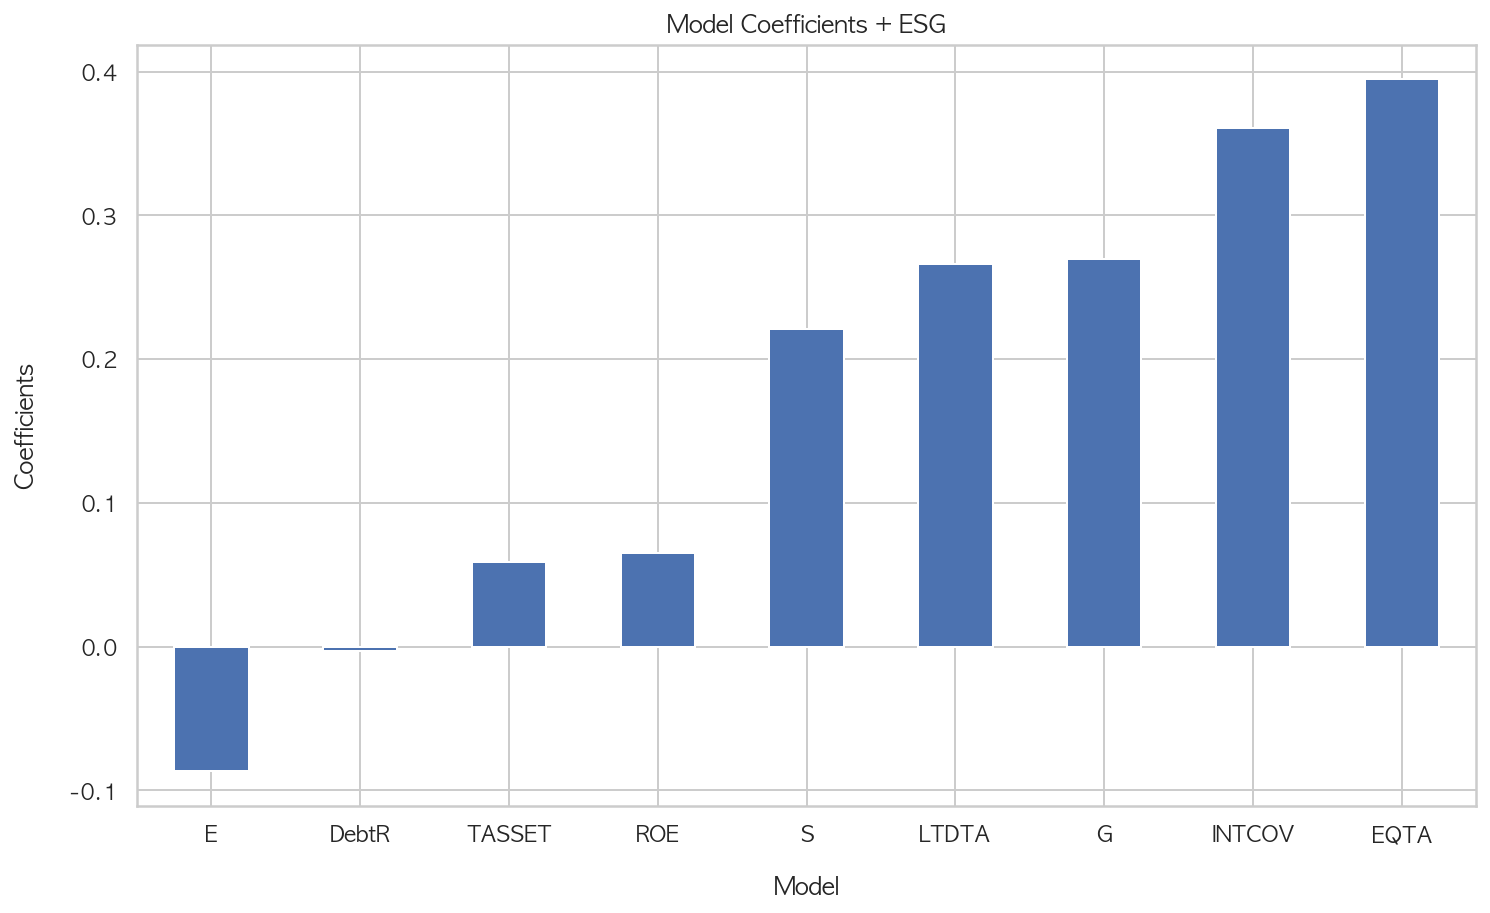

In [34]:
plt.figure(figsize = (12, 7))

predictors = df_train.columns
coef = pd.Series(regr.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = "Model Coefficients + ESG",align='center',alpha=1)
plt.xticks(rotation=0, size = 11)
plt.yticks(rotation=0, size = 11)
plt.xlabel("Model",labelpad=15)
plt.ylabel("Coefficients",labelpad=16)
plt.show()

In [35]:
# ESG 제거

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         7
         7.0       0.63      0.38      0.47        32
         8.0       0.41      0.78      0.54        64
         9.0       0.67      0.34      0.45        70
        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00         0

    accuracy                           0.48       180
   macro avg       0.29      0.25      0.24       180
weighted avg       0.52      0.48      0.45       180



In [36]:
# ESG 포함

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         7
           7       0.58      0.34      0.43        32
           8       0.48      0.77      0.59        64
           9       0.68      0.49      0.57        70
          10       0.12      0.14      0.13         7

    accuracy                           0.53       180
   macro avg       0.37      0.35      0.34       180
weighted avg       0.54      0.53      0.51       180



## Conclusion


- 신용평가를 받은 기업이 많지 않아 샘플수가 부족


- 신용평가와 ESG 등급을 산정하는 수식이 없다는 점에 정확한 신용평가 등급을 수치화를 하기 불가능


- ESG 등급은 KLGS에서 선정하는 등급을 사용하나 전세계적으로 통합된 어떤 기준이 없어 절대적이라고 보기 어려움

### Reference

- 나이스 (2020) 기업신용평가 주요 재무제표.

- 정흥준 외 (2019) 한국 대기업의 사회적 책임에 관한 연구 한국 노동 연구원

- 원상희, 전봉걸 (2012) 기업의 신용등급이 성과 및 활동성에 미치는 영향 분석

- 이현상, 오세환 (2019) 머신러닝 기법을 활용한 기업 신용위험 시계열 예측 모델 개발 연구

- 조양현 (2008) A Study on the Country Risk Assessment Methodology for the EU Member Countries
     한국외국어대학교 국제지역대학원 국제지역학과 유럽연합전공 

- Kocmanová, A. K., & Dočekalová, M. (2013, August 7). Construction of the economic indicators of performance in relation to environmental, social and corporate   governance (ESG) factors 
    Acta Universitatis Agriculturae et Silviculturae Mendelianae Brunensis. Mendel University Press 2020. https://acta.mendelu.cz/60/4/195/

- Han, J. (2016, December 12). Empirical study on relationship 
    between corporate social responsibility and financial performance in Korea. 

- Kim, J. D. (2016, December 12). Asian journal of sustainability and social responsibility Inaugural Editorial.
    Asian Journal of Sustainability and Social Responsibility. https://ajssr.springeropen.com/articles/10.1186/s41180-016-0006-z

- Novotná, M. (2012, October 15). The Use of Different Approaches for Credit Rating Prediction and Their Comparison by Martina Novotná :: SSRN. 
    Credit Rating Prediction. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2867849

- Jang , G., Kang, H.-G., Lee, Ju-Yeong , & Bae, K. (2020, March 25). ESG Scores and the Credit Market. 
    MDPI. https://www.mdpi.com/2071-1050/12/8/3456

- Cantino, V. (2017, October 31). ESG Sustainability and Financial Capital Structure: Where they Stand Nowadays | IRIS Uni Torino. IRIS Uni Torino.      https://iris.unito.it/handle/2318/1650869#.XwVumpMza3I